#Datasets Sangue

A high-resolution large-scale dataset of pathological and normal white blood cells - https://www.nature.com/articles/s41597-023-02378-7


Blood Cell Images - https://www.kaggle.com/datasets/paultimothymooney/blood-cells


Blood Cell Detection Dataset - https://www.kaggle.com/datasets/draaslan/blood-cell-detection-dataset


RoboFlow: Dataset com importação direta

Repositorio e artigo:

https://github.com/WongKinYiu/yolov9

https://arxiv.org/pdf/2402.13616

In [ ]:
import google.colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Pos_tech/Yolo_BC

/content/drive/MyDrive/Pos_tech/Yolo_BC


In [ ]:
%pwd

'/content/drive/MyDrive/Pos_tech/Yolo_BC/yolov9'

In [ ]:
!nvidia-smi

Sun Sep 15 12:24:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Clone repositorio YOLOv9
!git clone https://github.com/carlosfab/yolov9.git

# Change the current working directory to the cloned YOLOv9 repository
%cd yolov9

# Install the necessary dependencies for YOLOv9 from the requirements.txt file
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 372, done.
remote: Total 372 (delta 0), reused 0 (delta 0), pack-reused 372 (from 1)
Receiving objects: 100% (372/372), 2.54 MiB | 6.14 MiB/s, done.
Resolving deltas: 100% (185/185), done.
/content/drive/MyDrive/Pos_tech/Yolo_BC/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00


# Criando a estrutura basica

In [ ]:
%cd yolov9

[Errno 2] No such file or directory: 'yolov9'
/content/drive/MyDrive/Pos_tech/Yolo_BC/yolov9


In [ ]:
import sys
import os
import requests
from tqdm.notebook import tqdm
from pathlib import Path
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from IPython.display import display, Image
from PIL import Image as PILImage

# Configures the directories for code and data
CODE_FOLDER = Path(".").resolve()  # Code directory
WEIGHTS_FOLDER = CODE_FOLDER / "weights"  # Directory for model weights
DATA_FOLDER = CODE_FOLDER / "data"  # Directory for data

# Creates the directories for weights and data, if they don't exist
WEIGHTS_FOLDER.mkdir(exist_ok=True, parents=True)
DATA_FOLDER.mkdir(exist_ok=True, parents=True)

# Adds the code directory to the Python path for importing modules
sys.path.append(str(CODE_FOLDER))

In [ ]:
# URLs of weight files
weight_files = [
    "https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt",
    "https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt",
    "https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt",
    "https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt"
]

# Iterate over the list of URLs to download the weight files
for i, url in enumerate(weight_files, start=1):
    filename = url.split('/')[-1]
    response = requests.get(url, stream=True)
    total_size_in_bytes = int(response.headers.get('content-length', 0))
    block_size = 1024  # 1 Kilobyte
    with open(WEIGHTS_FOLDER / filename, 'wb') as file:
        for data in response.iter_content(block_size):
            file.write(data)

# Treinando o modelo

In [ ]:
dataset = '/content/drive/MyDrive/Pos_tech/Yolo_BC/yolov9/cbc-complete2.v1i.yolov9'

In [ ]:
!python train.py \
--batch 16 --epochs 20 --img 640 --device 0 --min-items 0 \
--data {dataset}/data.yaml \
--weights {WEIGHTS_FOLDER}/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

2024-09-15 13:40:44.884626: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-15 13:40:44.917830: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-15 13:40:44.927459: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-15 13:40:44.950417: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-15 13:40:46.592628: W tensorflow/compiler/tf2

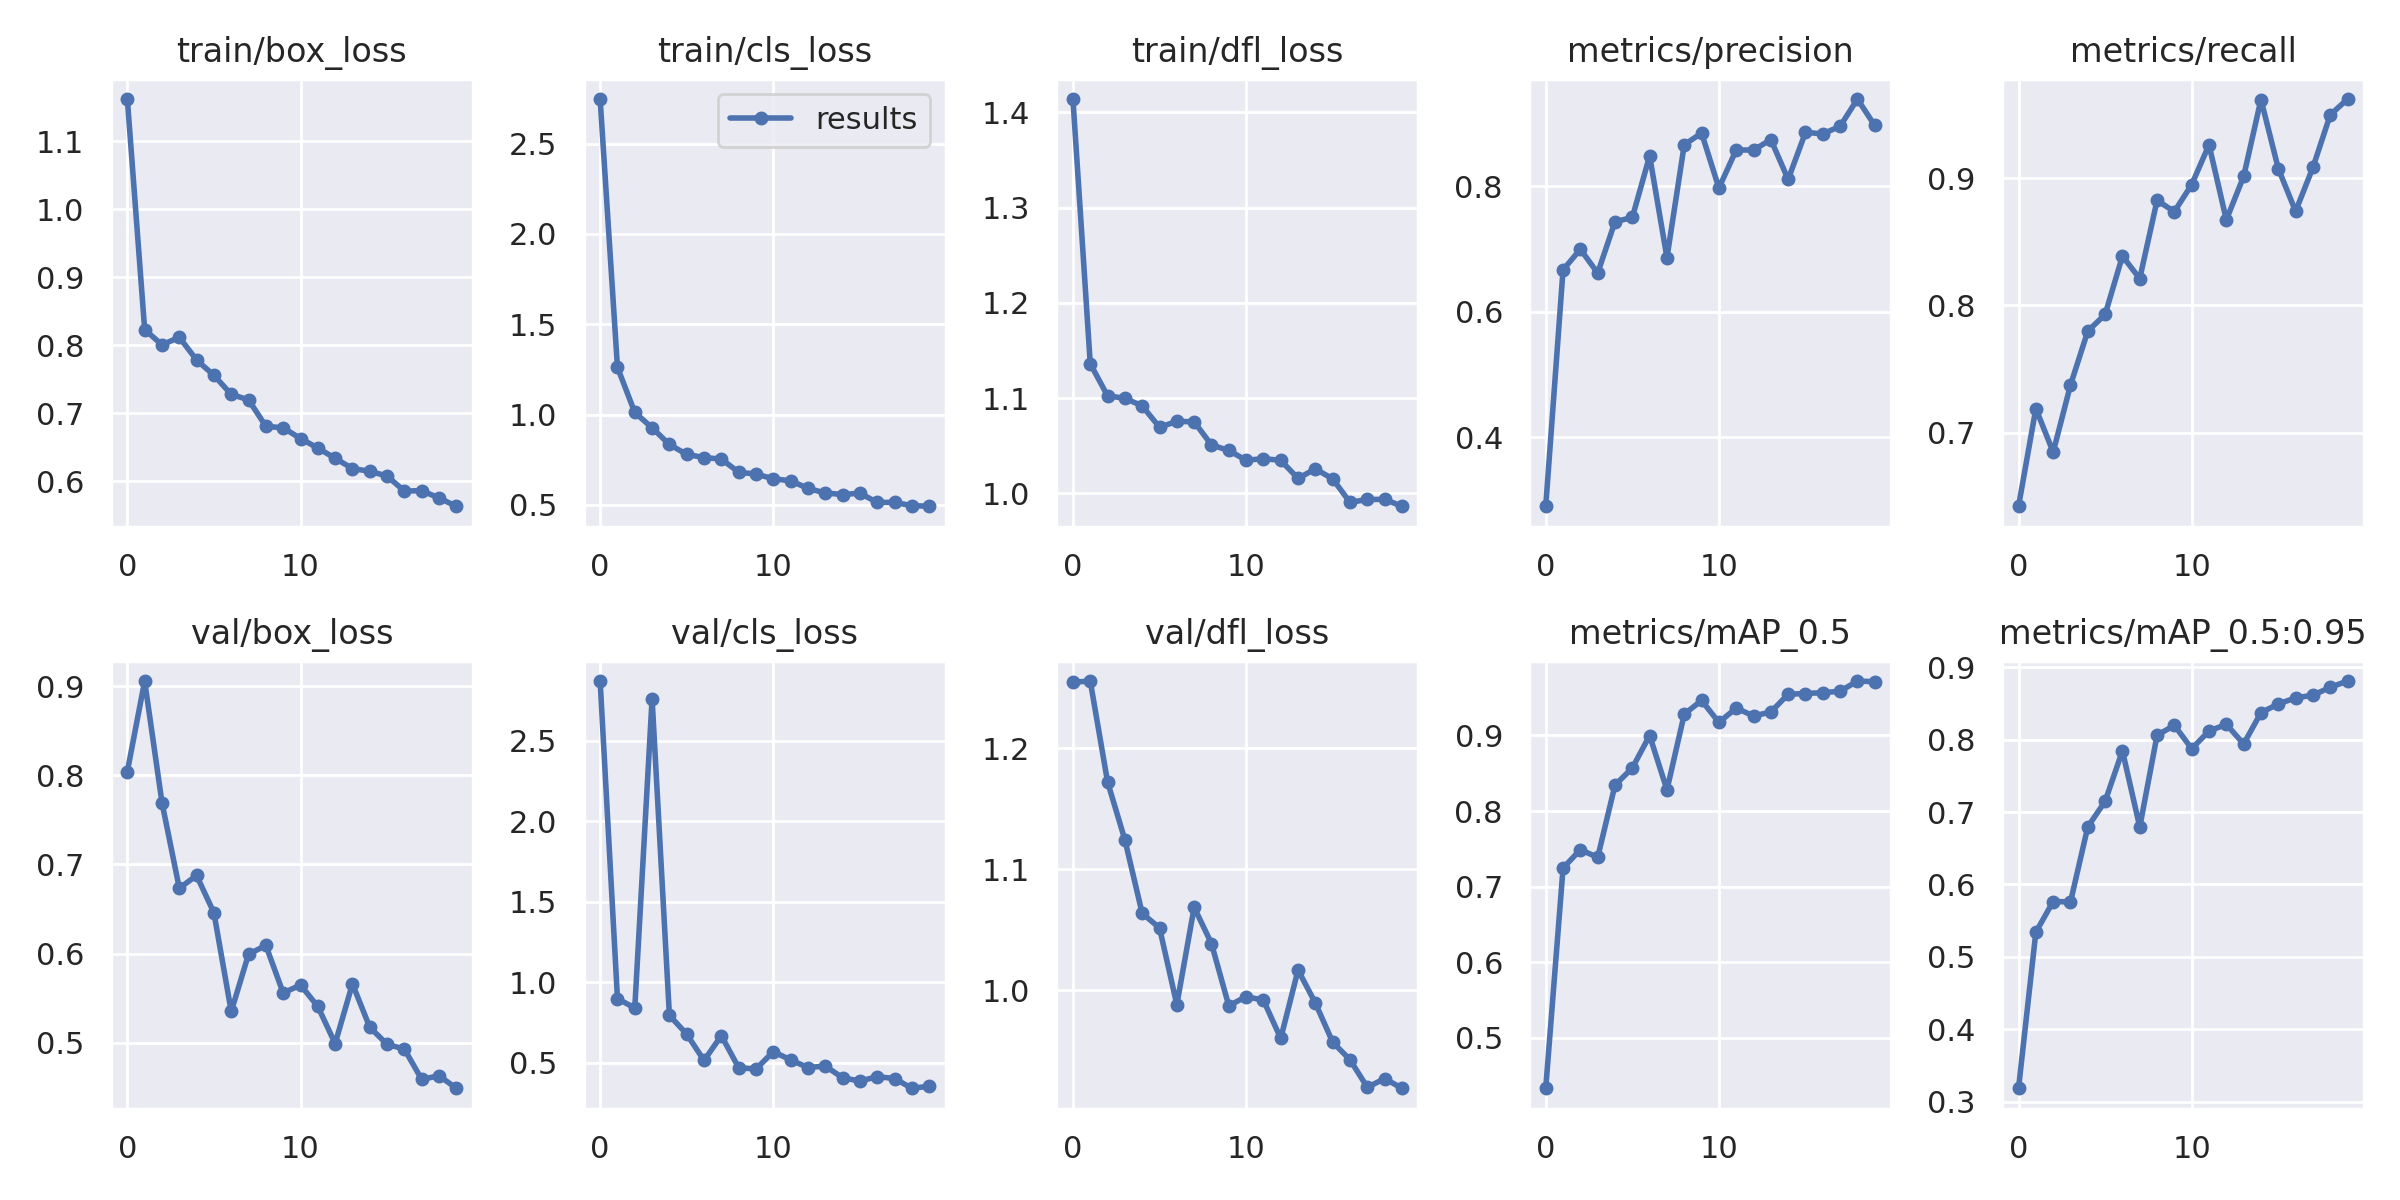

In [ ]:
# Path to the 'results.png' image
results_image_path = f'{CODE_FOLDER}/runs/train/exp6/results.png'

# Display the image with a specific size
Image(filename=results_image_path, width=800)

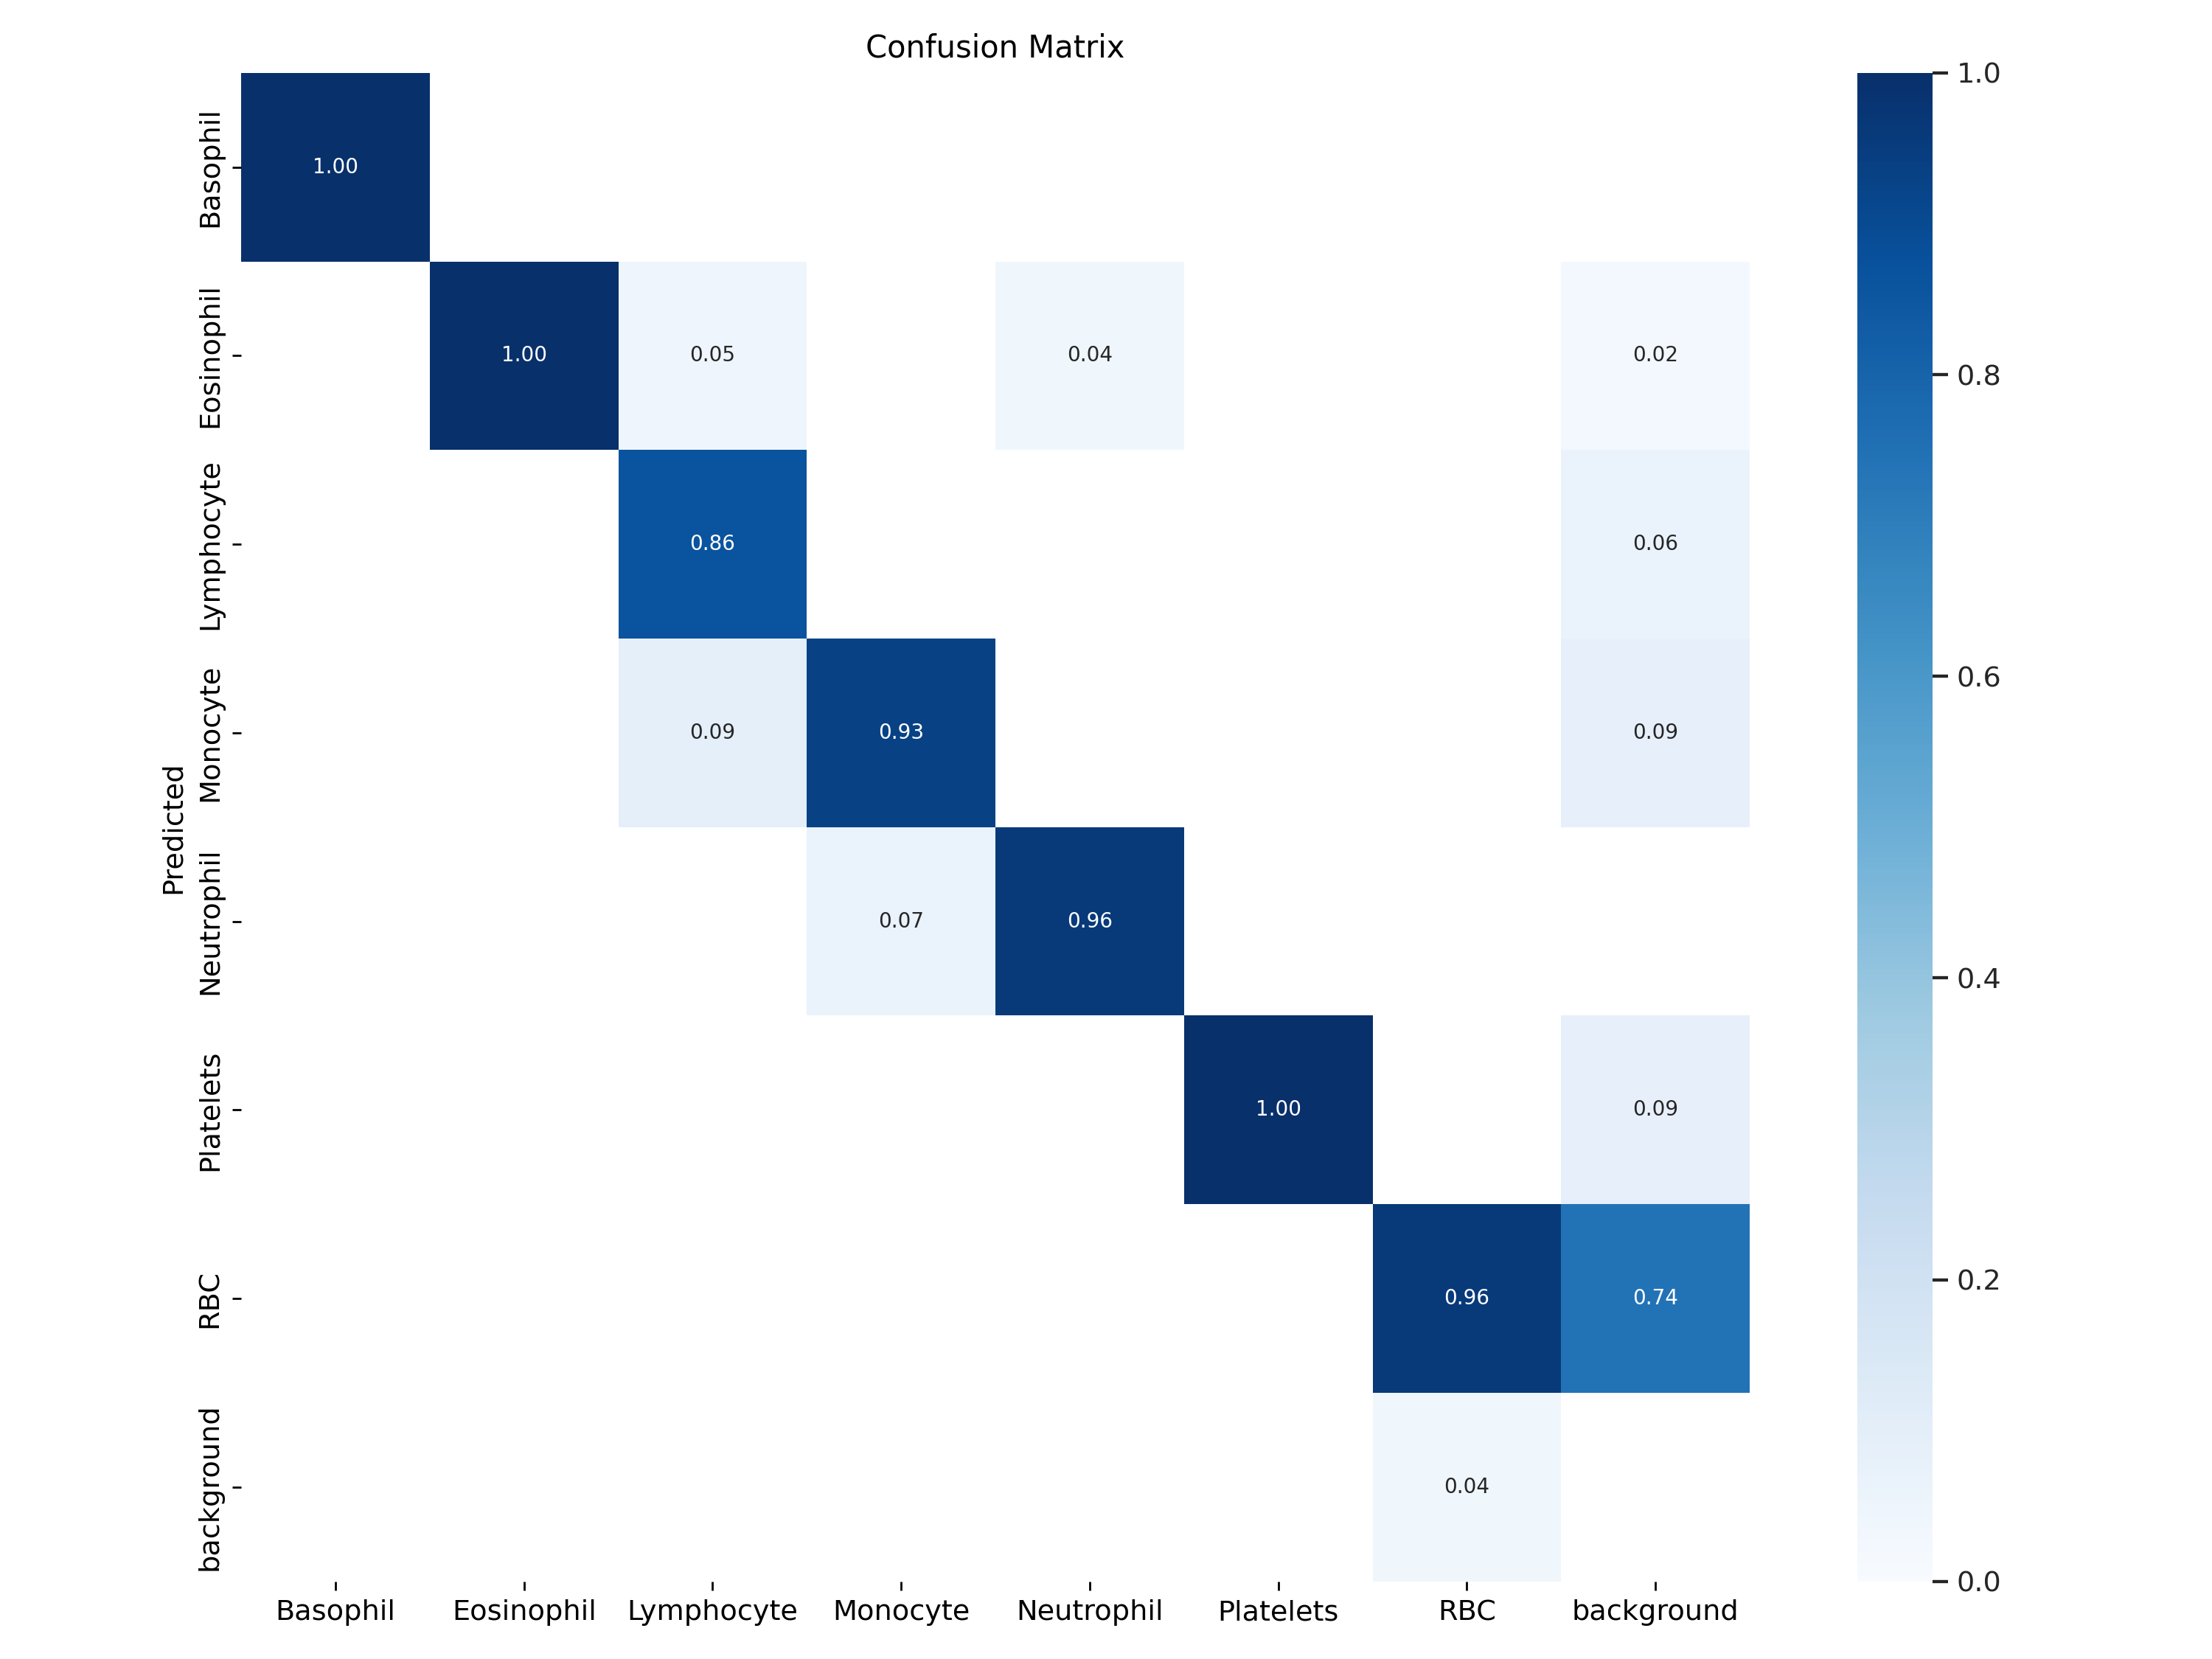

In [ ]:
# Path to the 'confusion_matrix.png' image
results_image_path = f'{CODE_FOLDER}/runs/train/exp6/confusion_matrix.png'

# Display the image with a specific size
Image(filename=results_image_path, width=800)

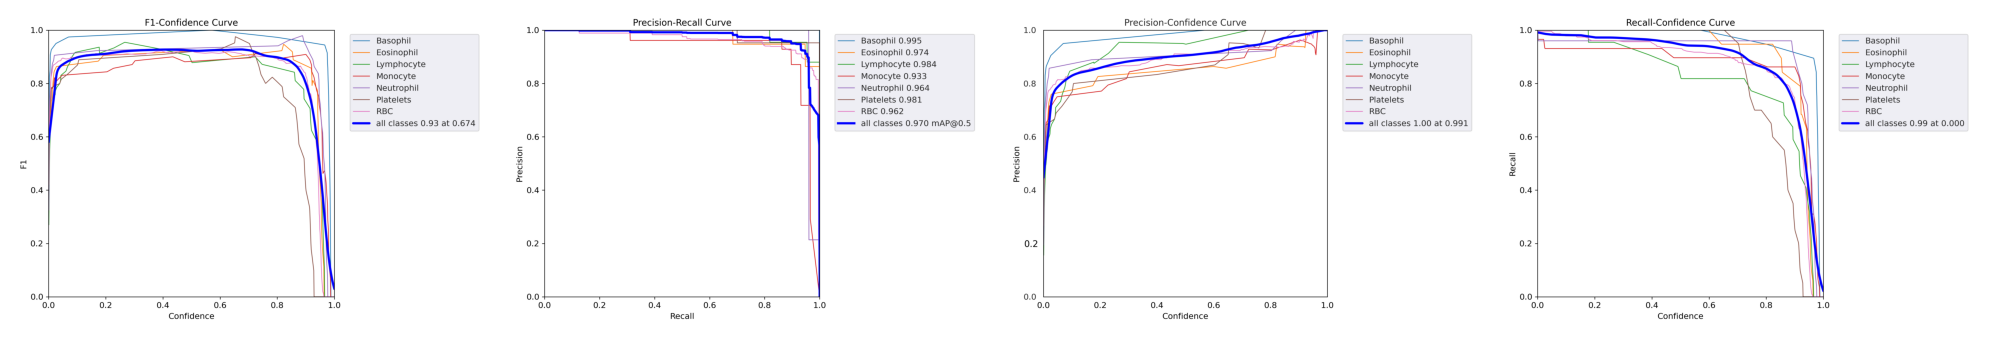

In [ ]:
# Path to the directory containing metric images
metrics_folder = os.path.join(CODE_FOLDER, 'runs/train/exp6')

# List of filenames of the main metrics to be displayed
metrics_files = ['F1_curve.png', 'PR_curve.png', 'P_curve.png', 'R_curve.png']

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, len(metrics_files), figsize=(20, 4))

# Loop to display each image in the corresponding subplot
for ax, metric_file in zip(axs, metrics_files):
    img_path = os.path.join(metrics_folder, metric_file)
    img = PILImage.open(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset}/data.yaml \
--weights {CODE_FOLDER}/runs/train/exp6/weights/best.pt

val: data=/content/drive/MyDrive/Pos_tech/Yolo_BC/yolov9/cbc-complete2.v1i.yolov9/data.yaml, weights=['/content/drive/MyDrive/Pos_tech/Yolo_BC/yolov9/runs/train/exp6/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLO 🚀 6b38221 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/drive/MyDrive/Pos_tech/Yolo_BC/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future releas

In [ ]:
!wget -P {DATA_FOLDER} https://editora.pucrs.br/edipucrs/acessolivre/livros/atlas-de-histologia/assets/img/tecido-conjuntivo/celulas-do-sangue/041.png

--2024-09-15 14:17:35--  https://editora.pucrs.br/edipucrs/acessolivre/livros/atlas-de-histologia/assets/img/tecido-conjuntivo/celulas-do-sangue/041.png
Resolving editora.pucrs.br (editora.pucrs.br)... 104.18.20.134, 104.18.21.134, 2606:4700::6812:1586, ...
Connecting to editora.pucrs.br (editora.pucrs.br)|104.18.20.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1119693 (1.1M) [image/png]
Saving to: ‘/content/drive/MyDrive/Pos_tech/Yolo_BC/yolov9/data/041.png’

041.png             100%[===================>]   1.07M  1.53MB/s    in 0.7s    

2024-09-15 14:17:37 (1.53 MB/s) - ‘/content/drive/MyDrive/Pos_tech/Yolo_BC/yolov9/data/041.png’ saved [1119693/1119693]



In [ ]:
!python detect.py \
  --img 640 --conf 0.1 --device 0 \
  --weights {CODE_FOLDER}/runs/train/exp6/weights/best.pt \
  --source {DATA_FOLDER}/041.png

detect: weights=['/content/drive/MyDrive/Pos_tech/Yolo_BC/yolov9/runs/train/exp6/weights/best.pt'], source=/content/drive/MyDrive/Pos_tech/Yolo_BC/yolov9/data/041.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 6b38221 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/drive/MyDrive/Pos_tech/Yolo_BC/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytor